# Exercícios - Introdução a Pandas

O objetivo desse notebook é ajudar na fixação dos conteúdos da aula de [Introdução a Pandas]().  

Caso haja alguma dúvida, consulte o material e as referências bibliográficas, mas também estamos à disposição por e-mail, slack ou telegram! Não hesite em falar conosco =D

## Estruturas

### Serie

In [55]:
# primeira coisa que se deve fazer para utilizar uma biblioteca....
import pandas as pd

In [56]:
# declare um dicionário com nomes de alunos e suas notas
report = {'john': 10, 'jane': 8, 'bob': 9, 'patrick': 3, 'blu': 5}

In [57]:
# imprima o dicionario
report

{'john': 10, 'jane': 8, 'bob': 9, 'patrick': 3, 'blu': 5}

In [58]:
# crie uma Serie utilizando esse dicionario
reportseries = pd.Series(report)

In [59]:
# imprima a serie
reportseries

john       10
jane        8
bob         9
patrick     3
blu         5
dtype: int64

In [60]:
# veja os indices da Serie
reportseries.index

Index(['john', 'jane', 'bob', 'patrick', 'blu'], dtype='object')

In [61]:
# veja a primeira nota
reportseries[0]

10

In [62]:
# veja a maior nota
reportseries.max()

10

In [63]:
# veja o aluno que tem a maior nota]
# (Dica: esse vai exigir uma pesquisa)
reportseries.argmax()

0

## Dataframe

In [104]:
# crie um Dataframe com os mesmos alunos. Ele deve ter como features o nome do aluno, 
# a nota da prova, a nota do trabalho e a nota do seminário 
rep = { 'Nome': ['John', 'Jane', 'Bob', 'Patrick', 'Blu'],
        'Prova': [10, 8, 9, 3, 5],
        'Trab': [9, 6, 7, 2, 1],
        'Seminario': [0, 4, 5, 2, 4]}

df = pd.DataFrame(rep)
df

,Nome,Prova,Trab,Seminario
0,John,10,9,0
1,Jane,8,6,4
2,Bob,9,7,5
3,Patrick,3,2,2
4,Blu,5,1,4


In [105]:
# salve esse dataframe como um arquivo no formato CSV, tendo ';' como separador
df.to_csv('report.csv', sep=';')

## Leitura de Dados

In [106]:
# leia o arquivo que você acabou de salvar com as informações dos alunos
df = pd.read_csv('report.csv', sep=';', index_col=0)
df

,Nome,Prova,Trab,Seminario
0,John,10,9,0
1,Jane,8,6,4
2,Bob,9,7,5
3,Patrick,3,2,2
4,Blu,5,1,4


## Visualização do Dataframe

In [107]:
# veja se os nomes das colunas para garantir que estão corretas
df.columns

Index(['Nome', 'Prova', 'Trab', 'Seminario'], dtype='object')

In [108]:
# veja se o dataframe tem o mesmo tamanho que tinha quando você o salvou
df.shape

(5, 4)

In [109]:
# veja os tipos das colunas e se fazem sentido
df.dtypes

Nome         object
Prova         int64
Trab          int64
Seminario     int64
dtype: object

In [110]:
# imprima os 3 primeiros exemplos usando a função head
df.head(3)

,Nome,Prova,Trab,Seminario
0,John,10,9,0
1,Jane,8,6,4
2,Bob,9,7,5


In [111]:
# imprima os 4 últimos exemplos usando a função tail
df.tail(4)

,Nome,Prova,Trab,Seminario
1,Jane,8,6,4
2,Bob,9,7,5
3,Patrick,3,2,2
4,Blu,5,1,4


## Seleção dos dados

In [112]:
# imprima as notas das provas
df['Prova']

0    10
1     8
2     9
3     3
4     5
Name: Prova, dtype: int64

In [113]:
# imprima as informações do primeiro aluno da tabela
df.iloc[0,:]

Nome         John
Prova          10
Trab            9
Seminario       0
Name: 0, dtype: object

In [114]:
# imprima as informações do aluno cuja label é 1 (index?)
df.loc[1]

Nome         Jane
Prova           8
Trab            6
Seminario       4
Name: 1, dtype: object

In [115]:
# altere a nota da prova do primeiro aluno para 5
df['Prova'].iat[0] = 5
df

,Nome,Prova,Trab,Seminario
0,John,5,9,0
1,Jane,8,6,4
2,Bob,9,7,5
3,Patrick,3,2,2
4,Blu,5,1,4


In [116]:
# altere a nota do seminario do aluno cuja label é 1 para 10
df['Seminario'].at[1] = 10
df

,Nome,Prova,Trab,Seminario
0,John,5,9,0
1,Jane,8,6,10
2,Bob,9,7,5
3,Patrick,3,2,2
4,Blu,5,1,4


## Indexação booleana

In [117]:
# cheque quais alunos tem nota de prova maior que 5
df[df['Prova'] > 5]

,Nome,Prova,Trab,Seminario
1,Jane,8,6,10
2,Bob,9,7,5


In [118]:
# cheque quais alunos foram aprovados (nota da prova >= 5 e média entre trabalho e seminário >= 5)
df[(df['Prova'] > 5) & ((df['Trab'] + df['Seminario']) / 2 >= 5.0)]

,Nome,Prova,Trab,Seminario
1,Jane,8,6,10
2,Bob,9,7,5


In [119]:
# conte quantos alunos reprovaram em pelo menos uma das avaliações (n)
df[(df['Prova'] < 5) | (df['Trab'] < 5) | (df['Seminario'] < 5)].shape[0]

3

## Operações

In [120]:
# veja a média da turma em cada avaliação
df.mean()

Prova        6.0
Trab         5.0
Seminario    4.2
dtype: float64

In [121]:
# veja a maior e a menor nota
df.max()
df.min()

Nome         Blu
Prova          3
Trab           1
Seminario      0
dtype: object

In [122]:
# crie uma nota feature no dataframe com a média do aluno
df['Media'] = (df['Prova'] + df['Trab'] + df['Seminario']) / 3.0
df

,Nome,Prova,Trab,Seminario,Media
0,John,5,9,0,4.666667
1,Jane,8,6,10,8.000000
2,Bob,9,7,5,7.000000
3,Patrick,3,2,2,2.333333
4,Blu,5,1,4,3.333333


## Apply

In [88]:
# crie uma feature nova contendo a maior nota que o aluno tirou dentre todas as avaliações
df

,Nome,Prova,Trab,Seminario,Media,maior_nota
0,John,5,9,0,4.666667,None
1,Jane,8,6,10,8.000000,None
2,Bob,9,7,5,7.000000,None
3,Patrick,3,2,2,2.333333,None
4,Blu,5,1,4,3.333333,None


## Funções Úteis

In [123]:
# quantos alunos tiraram cada nota na prova?
df['Prova'].value_counts()

5    2
3    1
9    1
8    1
Name: Prova, dtype: int64

In [133]:
# selecione as duas notas de trabalho mais frequentes
# (O que acontece se tivermos um empate triplo?)
df['Trab'].value_counts()[:2]

7    1
6    1
Name: Trab, dtype: int64

In [125]:
# veja o resumo estatístico da turma
df.describe()

,Prova,Trab,Seminario,Media
count,5.00000,5.000000,5.000000,5.000000
mean,6.00000,5.000000,4.200000,5.066667
std,2.44949,3.391165,3.768289,2.396757
min,3.00000,1.000000,0.000000,2.333333
25%,5.00000,2.000000,2.000000,3.333333
50%,5.00000,6.000000,4.000000,4.666667
75%,8.00000,7.000000,5.000000,7.000000
max,9.00000,9.000000,10.000000,8.000000


## Dados faltantes

In [135]:
# insira um novo aluno na tabela, o qual não tem nenhuma nota
novo = {'Nome': 'Carlos'}
df = df.append(novo, ignore_index=True)
df

,Nome,Prova,Trab,Seminario,Media
0,John,5.0,9.0,0.0,4.666667
1,Jane,8.0,6.0,10.0,8.000000
2,Bob,9.0,7.0,5.0,7.000000
3,Patrick,3.0,2.0,2.0,2.333333
4,Blu,5.0,1.0,4.0,3.333333
5,Carlos,NaN,NaN,NaN,NaN


In [137]:
# para o aluno que não tem nenhuma nota, atribua a ele a média da turma
df = df.fillna(df.mean())
df

,Nome,Prova,Trab,Seminario,Media
0,John,5.0,9.0,0.0,4.666667
1,Jane,8.0,6.0,10.0,8.000000
2,Bob,9.0,7.0,5.0,7.000000
3,Patrick,3.0,2.0,2.0,2.333333
4,Blu,5.0,1.0,4.0,3.333333
5,Carlos,6.0,5.0,4.2,5.066667


## Plot

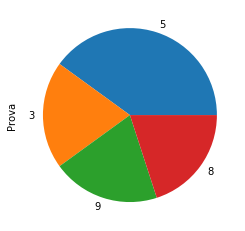

In [129]:
# veja a distribuição das notas
df['Prova'].value_counts().plot.pie()

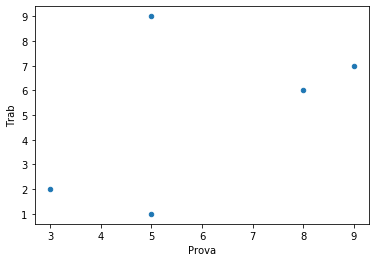

In [130]:
# cheque a relação entre as notas da prova e do trabalho
df.plot.scatter(x='Prova', y='Trab')

In [1]:
# cheque a relação entre as notas duas a duas